In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def RBFKernel(x,b,lda):
    return np.exp(-lda*np.dot(np.transpose(x-b),(x-b)))

In [4]:
x1 = np.linspace(-5,5, 1000)
x2 = np.linspace(-5,5, 1000)

x = [np.array(z) for z in zip(x1,x2)]

cost = [RBFKernel(i, np.array([0.5,0.5]), 1/(2*0.5**2)) for i in x]

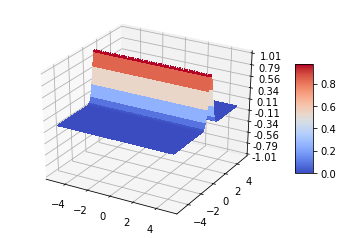

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = x1
Y = x2
X, Y = np.meshgrid(X, Y)
Z = np.array(cost).reshape(len(cost),1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=6)

plt.show()


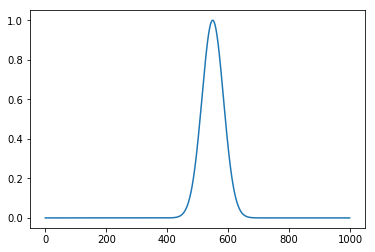

In [6]:
plt.plot(range(len(x)),cost)
plt.show()

In [7]:
def open_dataset(filename, sep=';'):
    data = []
    f = open(filename, 'r')
    for i in f.readlines():
        i = i.strip().strip(sep)
        if i != '--':
            row = [tuple(j.strip(')').strip('(').split(',')) for j in i.split(sep)]
            data.append(row)
    return data


In [8]:
dataset = open_dataset('log_file.txt')

In [9]:
print len(dataset)

70


In plot 0 mean length 93.0
In plot 1 mean length 96.0
In plot 2 mean length 74.4444444444
In plot 3 mean length 98.5555555556
In plot 4 mean length 122.25
In plot 5 mean length 91.2857142857
In plot 6 mean length 119.0
In plot 7 mean length 162.0
In plot 8 mean length 169.0
In plot 9 mean length 111.6
In plot 10 mean length 74.4
In plot 11 mean length 133.0
In plot 12 mean length 122.285714286
In plot 13 mean length 164.285714286
In plot 14 mean length 137.2
In plot 15 mean length 121.75
In plot 16 mean length 139.0
In plot 17 mean length 246.2
In plot 18 mean length 262.5
In plot 19 mean length 218.8


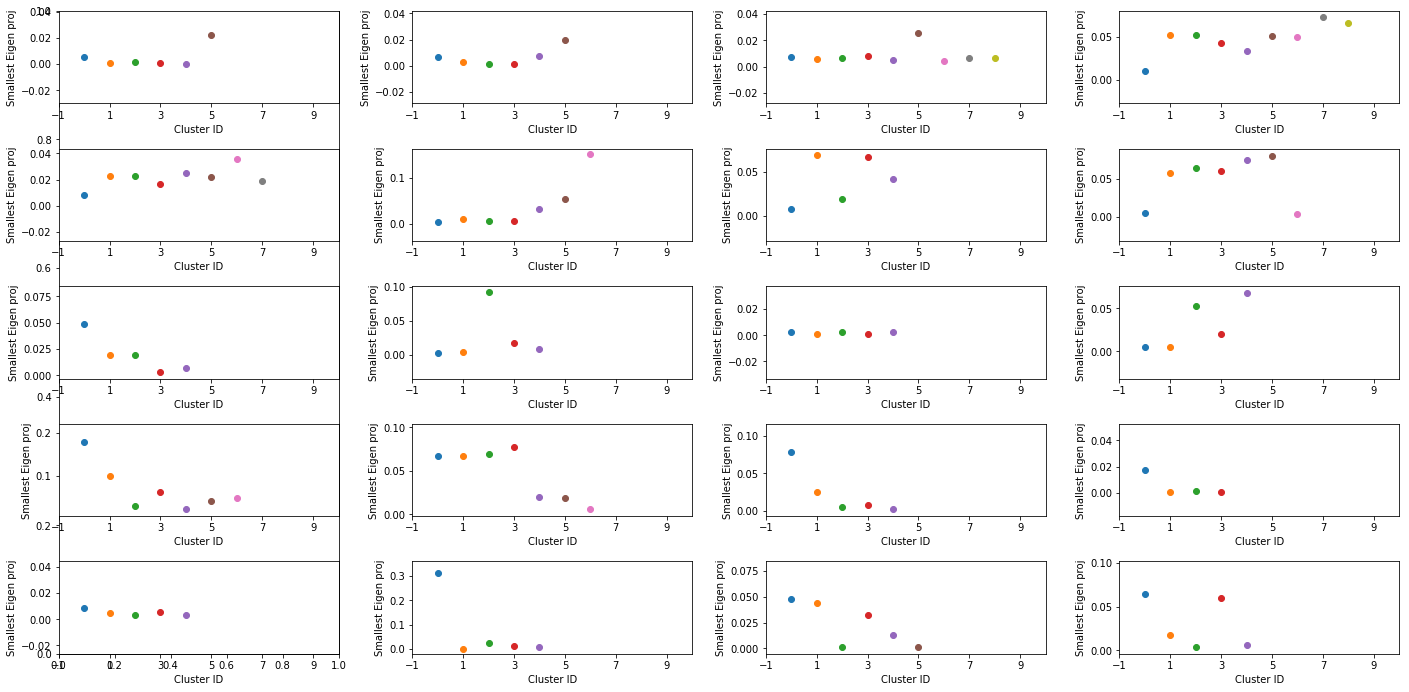

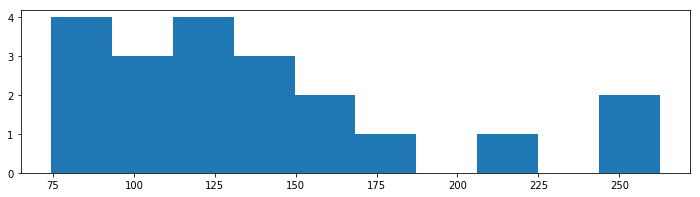

In [38]:
from collections import defaultdict
win = 5

fig = figure(figsize=(20,10))

ax = fig.add_subplot(1,4, 1)

s_lens = []
for p in range(20):
    ax = fig.add_subplot(5,4, p+1)
    
    clusters = defaultdict(list)
    
    for x, y in zip([int(j[0]) for j in dataset[p]], [float(j[1]) for j in dataset[p]]):
        clusters[x].append(y)
    
    lens = []
    for k, v in clusters.iteritems():
        
        var = np.var(v)
        
        lens.append(len(v))

        ax.scatter(k, np.var(v))
        ax.set_xlim((-1,10))
        ax.set_xticks(range(-1,11,2))
        ax.set_xlabel('Cluster ID')
        ax.set_ylabel('Smallest Eigen proj')
    
    s_lens.append(np.mean(lens))
    print "In plot {} mean length {}".format(p, np.mean(lens))
plt.tight_layout()
plt.show()

fig = figure(figsize=(12,3))
plt.hist(s_lens)
plt.show()

#### PLOT ALL VARS

Total number of windows: 70
Total number of clusters: 366


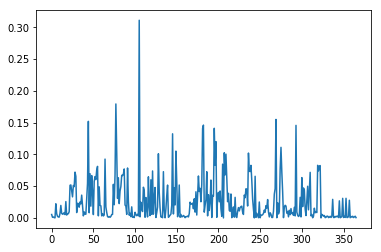

In [67]:
all_vars = []
lens = []

count = 0
nclusters = 0
for p in range(len(dataset)):
    clusters = defaultdict(list)
    for x, y in zip([int(j[0]) for j in dataset[p]], [float(j[1]) for j in dataset[p]]):
        clusters[x].append(y)
    
    for k, v in clusters.iteritems():
        var = np.var(v)
        all_vars.append(var)
        lens.append(len(v))
        nclusters +=1
    
    count +=1

print "Total number of windows: {}".format(count)
print "Total number of clusters: {}".format(nclusters)
plt.plot(all_vars)
plt.show()

366


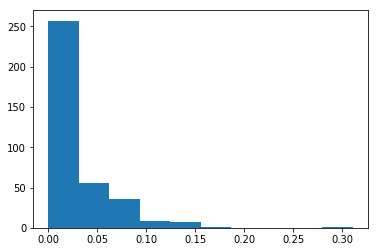

In [68]:
print len(all_vars)

plt.hist(all_vars)
plt.show()

In [69]:
def get_jenks_breaks(data_list, number_class):
    data_list.sort()
    mat1 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat1.append(temp)
    mat2 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat2.append(temp)
    for i in range(1, number_class + 1):
        mat1[1][i] = 1
        mat2[1][i] = 0
        for j in range(2, len(data_list) + 1):
            mat2[j][i] = float('inf')
    v = 0.0
    for l in range(2, len(data_list) + 1):
        s1 = 0.0
        s2 = 0.0
        w = 0.0
        for m in range(1, l + 1):
            i3 = l - m + 1
            val = float(data_list[i3 - 1])
            s2 += val * val
            s1 += val
            w += 1
            v = s2 - (s1 * s1) / w
            i4 = i3 - 1
            if i4 != 0:
                for j in range(2, number_class + 1):
                    if mat2[l][j] >= (v + mat2[i4][j - 1]):
                        mat1[l][j] = i3
                        mat2[l][j] = v + mat2[i4][j - 1]
        mat1[l][1] = 1
        mat2[l][1] = v
    k = len(data_list)
    kclass = []
    for i in range(number_class + 1):
        kclass.append(min(data_list))
    kclass[number_class] = float(data_list[len(data_list) - 1])
    count_num = number_class
    while count_num >= 2:  # print "rank = " + str(mat1[k][count_num])
        idx = int((mat1[k][count_num]) - 2)
        # print "val = " + str(data_list[idx])
        kclass[count_num - 1] = data_list[idx]
        k = int((mat1[k][count_num] - 1))
        count_num -= 1
    return kclass

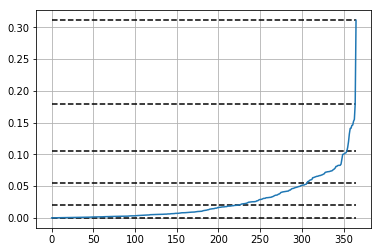

In [71]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(all_vars)
breaks = get_jenks_breaks(x, 5)

for line in breaks:
    plt.plot([line for _ in range(len(x))], 'k--')

plt.plot(x)
plt.grid(True)
plt.show()